In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [6]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

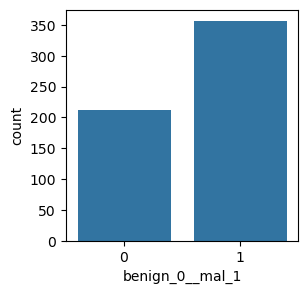

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

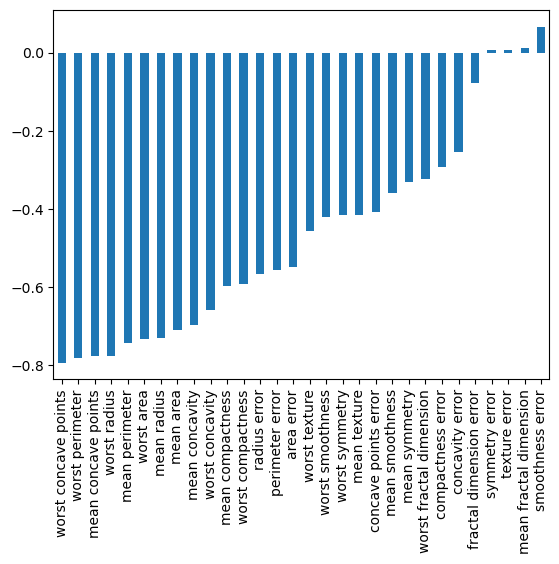

In [16]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

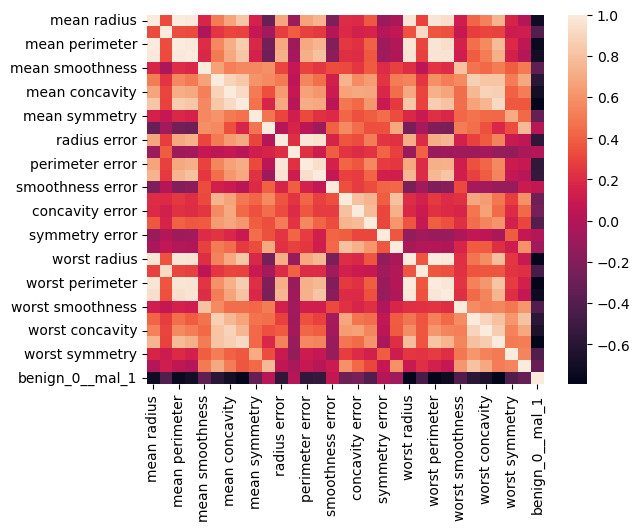

In [17]:
sns.heatmap(df.corr())

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1']

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

# Part 2

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [30]:
X_train.shape

(426, 30)

In [41]:
model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dense(15,activation ='relu'))
# Binary classification
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6687 - val_loss: 0.6440
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6272 - val_loss: 0.6095
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5931 - val_loss: 0.5678
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5469 - val_loss: 0.5181
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4896 - val_loss: 0.4629
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4446 - val_loss: 0.4109
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4029 - val_loss: 0.3623
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3520 - val_loss: 0.3214
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3095 - val_loss: 0.2863
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2656 - val_loss: 0.2586
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2580 - val_loss: 0.2360
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [35]:
losses = pd.DataFrame(model.history.history)

<Axes: >

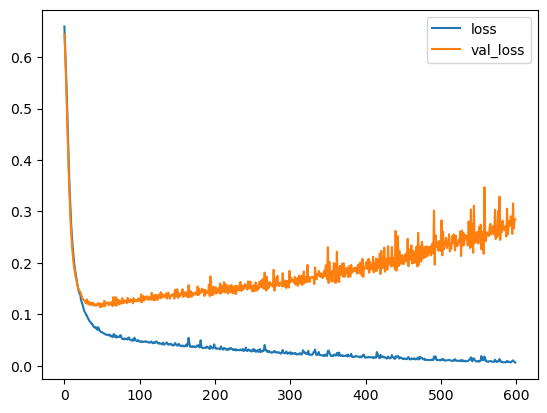

In [38]:
losses.plot()
#Shows overfitting
# Can we use Callbacks to stop overfitting?

In [42]:
#Reinstantiate the model
model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dense(15,activation ='relu'))
# Binary classification
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6831 - val_loss: 0.6618
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6445 - val_loss: 0.6209
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6051 - val_loss: 0.5794
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5645 - val_loss: 0.5214
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4972 - val_loss: 0.4585
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4393 - val_loss: 0.4023
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3878 - val_loss: 0.3548
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3530 - val_loss: 0.3140
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2861 - val_loss: 0.2799
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3110 - val_loss: 0.2558
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2841 - val_loss: 0.2354
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [46]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

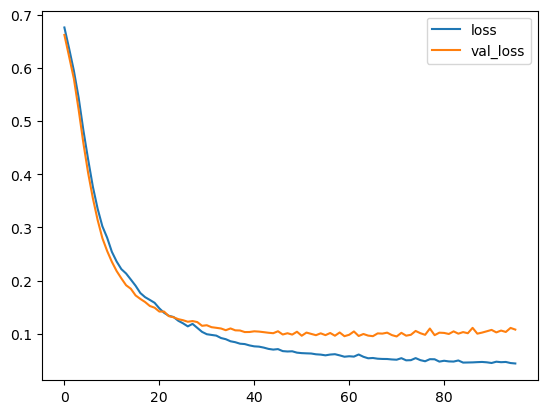

In [47]:
model_loss.plot()

In [63]:
# Add in dropout layers
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dropout(0.5)) # Hald the neurons will be switched off. Random each time
model.add(Dense(15,activation ='relu'))
model.add(Dropout(0.5))
# Binary classification
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [49]:
from tensorflow.keras.layers import Dropout

In [64]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6993 - val_loss: 0.6663
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6828 - val_loss: 0.6446
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6427 - val_loss: 0.6270
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6427 - val_loss: 0.6082
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6280 - val_loss: 0.5856
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6059 - val_loss: 0.5650
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5970 - val_loss: 0.5432
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5804 - val_loss: 0.5166
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5375 - val_loss: 0.4853
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5562 - val_loss: 0.4602
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5079 - val_loss: 0.4350
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

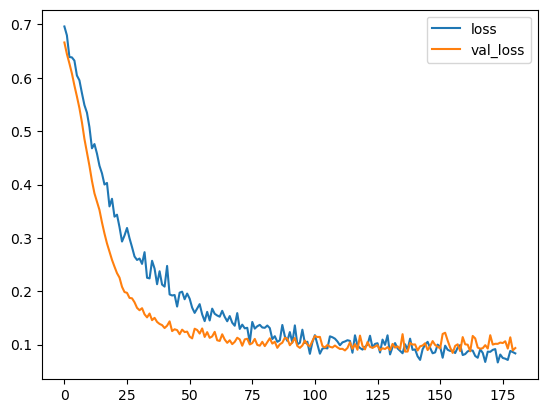

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [71]:
predictions = (model.predict(X_test) > 0.5) * 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
